In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import labs as lb

Цель работы: экспериментально исследовать свойства течения газов по тонким трубкам при различных числах Рейнольдса; выявить область применимости закона Пуазейля и с его помощью определить коэффициент вязкости воздуха.
	
В работе используются: система подачи воздуха (компрессор, поводящие трубки); газовый счетчик барабанного типа; спиртовой микроманометр с регулируемым наклоном; набор трубок различного диаметра с выходами для подсоединения микроманометра; секундомер.



Рассмотрим движение вязкой жидкости или газа по трубке круглого сечения. При малых скоростях потока движение оказывается ламинарным (слоистым), скорости частиц меняются по радиусу и направлены вдоль оси трубки. С увеличением скорости потока движение становится турбулентным, а слои перемешиваются. При турбулентном движении скорость в каждой точке быстро меняет величину и направление, сохраняется только средняя величина скорости.

Характер движения газа (или жидкости) в трубке определяется безразмерным числом Рейнольдса:

$$Re = \frac{vr\rho}{\eta}$$

где $v$ -- скорость потока, $r$ -- радиус трубки, $\rho$ -- плотность движущейся среды, $\eta$ -- её вязкость. В гладких трубах круглого сечения переход от ламининарного движения к турбулентному происходит при $Re \approx 1000$.

При ламинарном течении объем газа $V$, протекающий за время $t$ по трубе длиной $l$, определяется формулой Пуазейля:

$$Q = \frac{\pi r^4}{8 \Delta l \eta}(P_1 - P_2)$$

В этой формуле $P_1 - P_2$ -- разность давлений в двух выбранных сечениях 1 и 2, расстояние между которыми равно $\Delta l$. Величину $Q$ обычно называют расходом. Формула (1) позволяет определять вязкость газа по его расходу.

Отметим условия, при которых справедлива формула (1). Прежде всего необходимо, чтобы с достаточным запасом выполнялось неравенство $Re < 1000$. Необходимо также, чтобы при течении не происходило существенного изменения удельного объёма газа (при выводе формулы удельный объём считался постоянным). Для жидкости это предположение выполняется практически всегда, а для газа --- лишь в тех случаях, когда перепад давлений вдоль трубки мал по сравнению с самим давлением. В нашем случае давление газа равно атмосферному ($10^3$ см вод. ст.), а перепад давлений составляет не более 10 см вод. ст., т. е. менее 1\% от атмосферного. Формула (1) выводится для участков трубки, на которых закон распределения скоростей газа по сечению не меняется при двидении вдоль потока.

При втекании газа в трубку из большого резервуара скорости слоёв вначале постоянны по всему направлению. По мере продвижения газа по трубке картина распределения скоростей меняется, так как сила трения о стенку тормозит прилежащие к ней оси. Характерное для ламинарного течения параболическое распределение скоростей устанавливается на некотором расстоянии $a$ от входа в трубку, которое зависит от радиуса трубки $r$ и числа Рейнольдса по формуле 

$$a\approx 0.2rRe$$

Градиент давления на участке формирования потока оказывается больше, чем на участке с установившимся ламинарным течением, что позволяет разделить эти участки экспериментально. Формула (2) даёт возможность оценить дину участка формирования.




В работе используется газовый счётчик барабанного
типа, позволяющий измерять объём газа $\Delta V$ прошедшего через систему. Измеряя время $\Delta t$ при помощи секундомера, можно вычислить средний объёмный расход газа $Q = \Delta V/ \Delta t$ (для получения массового расхода [кг/с] результат
необходимо домножить на плотность газа $\rho$).


Работа счётчика основана на принципе вытеснения: на цилиндрической ёмкости жёстко
укреплены лёгкие чаши , где для
упрощения изображены только две чаши, в которые поочередно поступает воздух из входной
трубки расходомера. Когда чаша наполняется,
она всплывает и её место занимает следующая
и т.д. Вращение оси предаётся на счётно-суммирующее устройство.
Для корректной работы счётчика он должен
быть заполнен водой и установлен горизонтально по уровню (подробнее см. техническое
описание установки).

 В работе используется жидкостный манометр с наклонной трубкой. Разность давлений на входах манометра измеряется по высоте
подъёма этилового спирта. Регулировка
наклона позволяет измерять давление в различных диапазонах.

На крышке прибора установлен трехходовой кран, имеющий два рабочих
положения — (0) и (+). В положении (0) производится установка мениска жидкости на ноль, что необходимо сделать перед началом работы (в процессе работы также рекомендуется периодически проверять положение нуля). В положении (+) производятся измерения.



In [2]:
m = pd.read_csv("data1.csv")
m = m.drop(labels = [5, 6, 9, 12],axis = 0)
m["y"] = m["V"] / m["T"]
m = m.sort_values(by=['P'], ascending=True)
a = m[:7]
b = m[7:]

(0.0012±0.0001) (0.011±0.005)
(0.01056±0.00005)


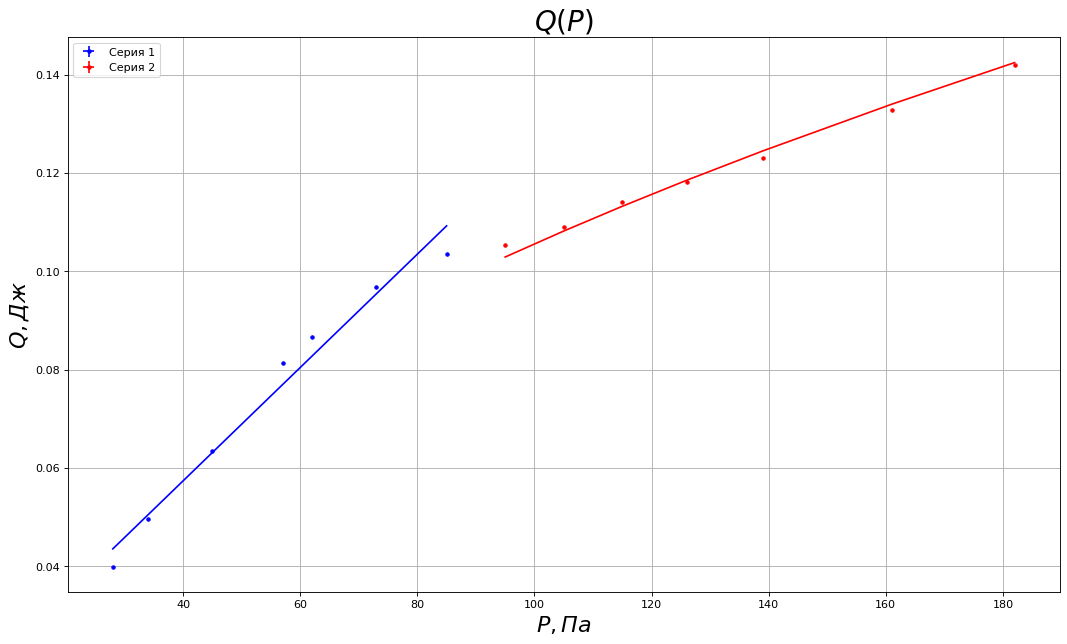

In [3]:
plt.figure(figsize=(16, 9), dpi=80)

plt.errorbar(x=a["P"].agg(lb.get_var), y=a["y"].agg(lb.get_var), xerr=a["P"].agg(lb.get_err), yerr=a["y"].agg(lb.get_err),
 fmt='.', label='Серия 1', color="blue")
plt.errorbar(x=b["P"].agg(lb.get_var), y=b["y"].agg(lb.get_var), xerr=b["P"].agg(lb.get_err), yerr=b["y"].agg(lb.get_err),
 fmt='.', label='Серия 2', color="red")

plt.title(r"$Q(P)$", fontsize=25)
plt.xlabel(r"$P, Па$", fontsize=20)
plt.ylabel(r"$Q, Дж$", fontsize=20)
plt.grid(True)
plt.legend()

k, de = lb.curve_fit(xdata=a["P"], ydata=a["y"])
print(k, de)
plt.plot(a["P"], lb.line(a["P"], k, de), label="Зависимость 1", color="blue")

def root(x, a):
    return a * x ** 0.5

params, cov = curve_fit(root, xdata=b["P"].agg(lb.get_var), ydata=b["y"].agg(lb.get_var))
k = lb.Value(params[0], np.sqrt(cov[0][0]))
print(k)
plt.plot(b["P"].agg(lb.get_var), root(b["P"].agg(lb.get_var), lb.get_var(k)), label="Зависимость 2", color="red")

In [4]:
m = pd.read_csv("data2.csv")
m

,l,P,V,t
0,130.5,73,3.0,54.24
1,120.0,61,2.0,53.52
2,90.0,45,5.0,67.49
3,50.0,25,1.0,26.05
4,40.0,20,1.5,41.42
5,70.0,36,1.5,40.75


AttributeError: module 'labs' has no attribute 'cure_fit'

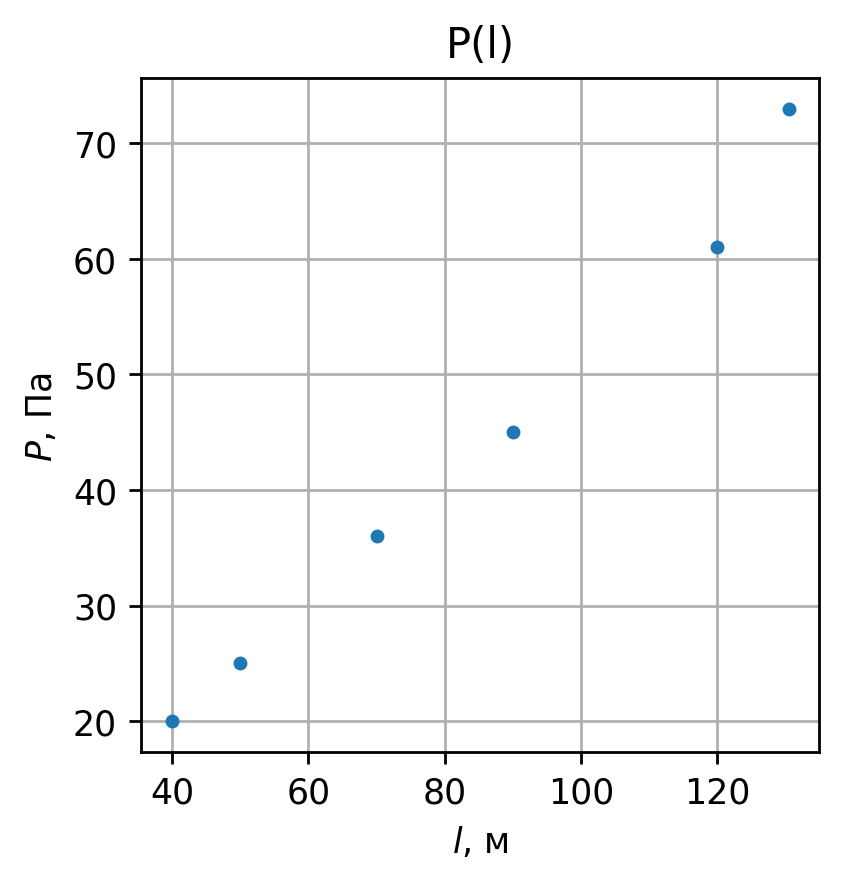

In [5]:
plt.figure(figsize=(3.5,3.5), dpi=250)
plt.ylabel("$P$, Па ")
plt.xlabel("$l$, м")
plt.title('P(l)')
plt.grid(True, linestyle="-")
plt.errorbar(y=m['P'], x=m['l'], fmt='.')


k, b = lb.cure_fit(m["l"], m["P"])
print(k, b)
plt.plot(m["l"], lb.line(m["l"], k, b), label="Зависимость 1", color="blue")